In [14]:
from io import IncrementalNewlineDecoder
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras import models
from keras import layers


In [ ]:
#Загрузка данных

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
#Просмотр формата отзывов


In [4]:
print(x_train[9])

[1, 14, 20, 47, 111, 439, 3445, 19, 12, 15, 166, 12, 216, 125, 40, 6, 364, 352, 707, 1187, 39, 294, 11, 22, 396, 13, 28, 8, 202, 12, 1109, 23, 94, 2, 151, 111, 211, 469, 4, 20, 13, 258, 546, 1104, 7273, 12, 16, 38, 78, 33, 211, 15, 12, 16, 2849, 63, 93, 12, 6, 253, 106, 10, 10, 48, 335, 267, 18, 6, 364, 1242, 1179, 20, 19, 6, 1009, 7, 1987, 189, 5, 6, 8419, 7, 2723, 2, 95, 1719, 6, 6035, 7, 3912, 7144, 49, 369, 120, 5, 28, 49, 253, 10, 10, 13, 1041, 19, 85, 795, 15, 4, 481, 9, 55, 78, 807, 9, 375, 8, 1167, 8, 794, 76, 7, 4, 58, 5, 4, 816, 9, 243, 7, 43, 50]


In [6]:
y_train[19]

1

In [ ]:
#Смотрим словарь слов


In [7]:
word_index = imdb.get_word_index()
word_index

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
#Делаем реверсивный словарь

In [8]:
reverse_word_index = dict([(value, key)for (key, value) in word_index.items()])
for i in range(1,31):
  print(i, '=', reverse_word_index[i])#30 самых популярных слов в отзывах

1 = the
2 = and
3 = a
4 = of
5 = to
6 = is
7 = br
8 = in
9 = it
10 = i
11 = this
12 = that
13 = was
14 = as
15 = for
16 = with
17 = movie
18 = but
19 = film
20 = on
21 = not
22 = you
23 = are
24 = his
25 = have
26 = he
27 = be
28 = one
29 = all
30 = at


In [ ]:
#Декодируем отзыв

In [10]:
decoded_review = ' '.join([reverse_word_index[i] for i in x_train[209]])
decoded_review

"the just its great was with door in realistic as you most br of appeal br of masterpieces and and and an show of setting to of and or of kane appeal to of white br of you for as you it an has of environment or of midnight and gary but impressed since i i take in only you'd location and it in and and when even and even fiend with in ms leather conclusion admirable to and suffice with in and and and apocalypse sixties are remember setting elm york goes my mother much i i of using it around german blood not that with much bit shootout site realism conventional anyone who and and difficulty brave language is say to hippie best in matter cast all them cat tv in another movie is and are is and know all and be inside ashamed film be makers annoy and and walker any in twenty made in at is and conventional discovering world does don't for art not best second board of revelation festival br of and end is wait film designs within any and low br of and movie is effect of ashamed he historical som

In [ ]:
#Делаю векторизацию текста в формате one hot encoding

In [11]:
def vectorize_sequences(sequences, demission = 10000):
  results = np.zeros((len(sequences), demission))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [12]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [13]:
x_train[19]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
#Строим нейронную сеть для определдения положительного или отрицательного отзыва

In [18]:
from importlib import import_module
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))#Первый входной слой
model.add(layers.Dense(16, activation='relu'))#Второй входной слой
model.add(layers.Dense(1, activation='sigmoid'))#Выходной слой

In [ ]:
#Компиляция модели

In [20]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
#Обучение модели

In [21]:
textmodel = model.fit(x_train, y_train, epochs=20, batch_size=128,validation_split=0.1)#Размер выборки = 128, 10% передаем под проверку

Epoch 1/20
176/176 [==============================] - 3s 13ms/step - loss: 0.3823 - accuracy: 0.8533 - val_loss: 0.2805 - val_accuracy: 0.8900
Epoch 2/20
176/176 [==============================] - 2s 12ms/step - loss: 0.2141 - accuracy: 0.9199 - val_loss: 0.2861 - val_accuracy: 0.8872
Epoch 3/20
176/176 [==============================] - 3s 19ms/step - loss: 0.1695 - accuracy: 0.9385 - val_loss: 0.2935 - val_accuracy: 0.8916
Epoch 4/20
176/176 [==============================] - 2s 12ms/step - loss: 0.1407 - accuracy: 0.9493 - val_loss: 0.3266 - val_accuracy: 0.8872
Epoch 5/20
176/176 [==============================] - 2s 10ms/step - loss: 0.1175 - accuracy: 0.9596 - val_loss: 0.3649 - val_accuracy: 0.8876
Epoch 6/20
176/176 [==============================] - 2s 13ms/step - loss: 0.0953 - accuracy: 0.9680 - val_loss: 0.3997 - val_accuracy: 0.8800
Epoch 7/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0754 - accuracy: 0.9747 - val_loss: 0.4607 - val_accuracy: 0.8764


In [15]:
#Визуализация процесса обучения

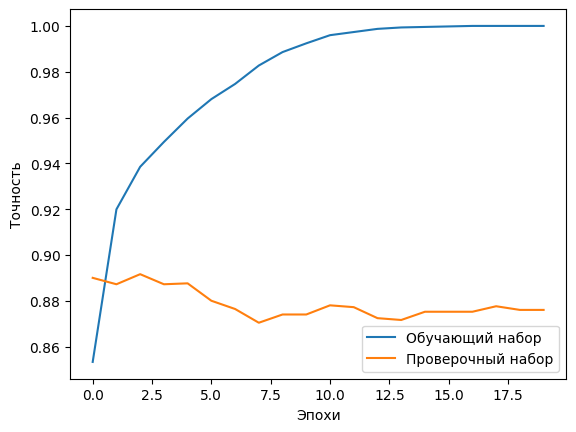

In [22]:
plt.plot(textmodel.history['accuracy'],
         label = 'Обучающий набор')
plt.plot(textmodel.history['val_accuracy'],
         label = 'Проверочный набор')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [ ]:
#Проверка качества нейросети на тестовом наборе

In [24]:
finalscore = model.evaluate(x_test, y_test )

782/782 [==============================] - 2s 3ms/step - loss: 1.4154 - accuracy: 0.8555
